In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
from scipy.special import softmax

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
fish_target = fish['Species'].to_numpy()

In [6]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=1234)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(119, 5) (40, 5)
(119,) (40,)


In [7]:
scaler = StandardScaler()

scaler.fit(train_input)
train_input_scaled = scaler.transform(train_input)
test_input_scaled = scaler.transform(test_input)

### Multi-class Classification

In [8]:
kn = KNeighborsClassifier(n_neighbors=3)

kn.fit(train_input_scaled, train_target)

print(kn.score(train_input_scaled, train_target))
print(kn.score(test_input_scaled, test_target))

0.9159663865546218
0.775


In [9]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [10]:
print(kn.predict(test_input_scaled[:5]))
print(test_target[:5])

['Perch' 'Bream' 'Roach' 'Pike' 'Smelt']
['Perch' 'Bream' 'Whitefish' 'Pike' 'Perch']


In [12]:
proba = kn.predict_proba(test_input_scaled[:5])
print(proba.round(4))

[[0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.3333 0.     0.6667 0.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]]


In [13]:
distances, indexes = kn.kneighbors(test_input_scaled[3:4])
print(train_target[indexes])

[['Pike' 'Pike' 'Pike']]


### Logistic Regression

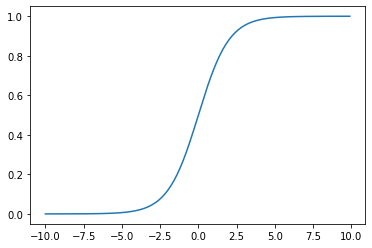

''

In [14]:
z = np.arange(-10, 10, 0.1)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid)
plt.show()
;

In [15]:
bs_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_input_scaled_bs = train_input_scaled[bs_indexes]
train_target_bs = train_target[bs_indexes]

print(train_input_scaled_bs.shape)
print(train_target_bs.shape)

(38, 5)
(38,)


In [16]:
lr = LogisticRegression()
lr.fit(train_input_scaled_bs, train_target_bs)

LogisticRegression()

In [17]:
print(lr.predict(train_input_scaled_bs[:5]))
print(lr.predict_proba(train_input_scaled_bs[:5]))

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']
[[9.97233752e-01 2.76624809e-03]
 [9.83509950e-01 1.64900496e-02]
 [9.95261079e-01 4.73892141e-03]
 [9.95494027e-01 4.50597319e-03]
 [9.99612412e-01 3.87588185e-04]]


In [18]:
print(lr.classes_)

['Bream' 'Smelt']


In [19]:
print(lr.coef_, lr.intercept_)

[[-0.42215281 -0.61151872 -0.69625099 -1.0110994  -0.77793254]] [-2.36419515]


In [20]:
# decisions: = the value of parameter in the sigmoid function
decisions = lr.decision_function(train_input_scaled_bs[:5])
print(decisions.round(2))
print(lr.predict(train_input_scaled_bs[:5]))

[-5.89 -4.09 -5.35 -5.4  -7.86]
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [22]:
# expit: sigmoid function
print(expit(decisions))

[0.00276625 0.01649005 0.00473892 0.00450597 0.00038759]


### Logistic Regression with Multi-class Classification

In [23]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_input_scaled, train_target)

print(lr.score(train_input_scaled, train_target))
print(lr.score(test_input_scaled, test_target))

0.9411764705882353
0.825


In [24]:
print(lr.predict(test_input_scaled[:5]))
print(test_target[:5])

['Perch' 'Bream' 'Roach' 'Pike' 'Smelt']
['Perch' 'Bream' 'Whitefish' 'Pike' 'Perch']


In [25]:
proba = lr.predict_proba(test_input_scaled[:5])
print(proba.round(2))

[[0.   0.   0.92 0.   0.07 0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.  ]
 [0.02 0.01 0.34 0.01 0.49 0.   0.13]
 [0.   0.   0.05 0.93 0.01 0.   0.01]
 [0.   0.03 0.45 0.   0.05 0.47 0.  ]]


In [26]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [27]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [28]:
# decisions:= the value of parameter in the sigmoid function
decisions = lr.decision_function(test_input_scaled[:5])
print(decisions.round(2))

[[ -6.46  -2.01   5.84  -0.76   3.25  -0.2    0.34]
 [ 13.61   5.02  -6.24  -0.94   0.86 -18.52   6.2 ]
 [ -0.05  -0.68   2.82  -0.57   3.18  -6.59   1.88]
 [ -1.32  -7.52   3.32   6.29   1.18  -3.95   1.99]
 [ -9.98   2.01   4.74  -3.94   2.47   4.8   -0.1 ]]


In [29]:
proba = softmax(decisions, axis=1)
print(proba.round(2))

[[0.   0.   0.92 0.   0.07 0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.  ]
 [0.02 0.01 0.34 0.01 0.49 0.   0.13]
 [0.   0.   0.05 0.93 0.01 0.   0.01]
 [0.   0.03 0.45 0.   0.05 0.47 0.  ]]
